In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [29]:
cd_full = pd.read_excel('D:/Credit data.xlsx')

In [30]:
cd_full.drop_duplicates(inplace=True)
cd_full.index = range(cd_full.shape[0])
cd_full["NumberOfDependents"].fillna(int(cd_full["NumberOfDependents"].mode()),inplace=True)
cd_full.index = range(cd_full.shape[0])

In [31]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=1000)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [32]:
X = cd_full.iloc[:,1:]
y = cd_full["SeriousDlqin2yrs"]
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
cd_full.loc[cd_full.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [33]:
cd_full.index = range(cd_full.shape[0])
cd_full=cd_full
cd_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9996 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9996 non-null   float64
 2   age                                   9996 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9996 non-null   int64  
 4   DebtRatio                             9996 non-null   float64
 5   MonthlyIncome                         9996 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9996 non-null   int64  
 7   NumberOfTimes90DaysLate               9996 non-null   int64  
 8   NumberRealEstateLoansOrLines          9996 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9996 non-null   int64  
 10  NumberOfDependents                    9996 non-null   float64
dtypes: float64(4), in

In [34]:
cd_full.index = range(cd_full.shape[0])
def data_deal(cd_full):
    cd_full=cd_full[cd_full['RevolvingUtilizationOfUnsecuredLines']<=2]
    cd_full=cd_full[(cd_full['age']>=0)&(cd_full['age']<=100)]
    cd_full=cd_full[cd_full['NumberOfTime30-59DaysPastDueNotWorse']<24]
    cd_full=cd_full[cd_full['NumberOfTime60-89DaysPastDueNotWorse']<12]
    cd_full=cd_full[cd_full['NumberOfTimes90DaysLate']<8]
    cd_full=cd_full[cd_full['DebtRatio']<=2]
    cd_full=cd_full[cd_full['NumberOfDependents']<20]
    return cd_full
    
cd_full = data_deal(cd_full)
cd_full.index = range(cd_full.shape[0])
cd_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923 entries, 0 to 7922
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      7923 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  7923 non-null   float64
 2   age                                   7923 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  7923 non-null   int64  
 4   DebtRatio                             7923 non-null   float64
 5   MonthlyIncome                         7923 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       7923 non-null   int64  
 7   NumberOfTimes90DaysLate               7923 non-null   int64  
 8   NumberRealEstateLoansOrLines          7923 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  7923 non-null   int64  
 10  NumberOfDependents                    7923 non-null   float64
dtypes: float64(4), in

In [35]:
X = cd_full.iloc[:, 1:]
y = cd_full["SeriousDlqin2yrs"].values
print (X.shape, y.shape)

(7923, 10) (7923,)


In [36]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923 entries, 0 to 7922
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  7923 non-null   float64
 1   age                                   7923 non-null   int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  7923 non-null   int64  
 3   DebtRatio                             7923 non-null   float64
 4   MonthlyIncome                         7923 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       7923 non-null   int64  
 6   NumberOfTimes90DaysLate               7923 non-null   int64  
 7   NumberRealEstateLoansOrLines          7923 non-null   int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  7923 non-null   int64  
 9   NumberOfDependents                    7923 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 619.1 KB


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [37]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=420)

model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])

model_data.columns = cd_full.columns
test_data = pd.concat([Y_test, X_test], axis=1)
test_data.index = range(vali_data.shape[0])
test_data.columns = cd_full.columns
model_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      5546 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  5546 non-null   float64
 2   age                                   5546 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  5546 non-null   int64  
 4   DebtRatio                             5546 non-null   float64
 5   MonthlyIncome                         5546 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       5546 non-null   int64  
 7   NumberOfTimes90DaysLate               5546 non-null   int64  
 8   NumberRealEstateLoansOrLines          5546 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  5546 non-null   int64  
 10  NumberOfDependents                    5546 non-null   float64
dtypes: float64(4), in

(None, None)

In [38]:
model_data.to_csv(r"model_data.csv")
vali_data.to_csv(r"vali_data.csv")

In [39]:
#归一化
from sklearn import preprocessing
x_train=model_data.iloc[:, 1:]
y_train = model_data['SeriousDlqin2yrs'].values
x_test = test_data.iloc[:, 1:].values
print (x_train.shape, y_train.shape, x_test.shape)


train_scaler = preprocessing.StandardScaler().fit(x_train)
print( train_scaler.mean_ , '\n'+'-'*50+'\n', train_scaler.scale_)
print('='*10)
test_scaler = preprocessing.StandardScaler().fit(x_test)
print( test_scaler.mean_ , '\n'+'-'*50+'\n', test_scaler.scale_)

(5546, 10) (5546,) (2377, 10)
[3.32557268e-01 5.14049766e+01 2.61269383e-01 3.42942781e-01
 6.81488163e+03 8.62657771e+00 9.06959971e-02 1.04056978e+00
 6.52722683e-02 8.27984133e-01] 
--------------------------------------------------
 [3.51661714e-01 1.44927978e+01 7.22920892e-01 3.00913776e-01
 7.37249745e+03 5.10961071e+00 4.44418832e-01 1.10009931e+00
 3.22374954e-01 1.15464043e+00]
[3.38672509e-01 5.13824148e+01 2.58729491e-01 3.36302592e-01
 6.51092762e+03 8.60748843e+00 9.46571308e-02 9.97896508e-01
 6.85738326e-02 7.91333614e-01] 
--------------------------------------------------
 [3.57441271e-01 1.43609838e+01 7.53028205e-01 2.89006826e-01
 5.09365763e+03 5.10770767e+00 4.46414287e-01 1.05047007e+00
 3.25486249e-01 1.09200280e+00]


In [40]:
x_train_scaled = train_scaler.transform(x_train)
x_test_scaled = vali_scaler.transform(x_test)

x_train_scaled.mean(axis=0), x_train_scaled.std(axis=0),  x_test_scaled.mean(axis=0), x_test_scaled.std(axis=0)

(array([ 1.58225799e-16,  1.70397014e-16, -4.48413194e-17,  1.26196285e-16,
        -8.90420486e-17, -6.14966666e-17,  8.96826388e-18,  6.79025694e-17,
        -3.58730555e-17, -7.68708333e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-2.39139331e-17, -4.55859349e-17,  2.39139331e-17,  1.94300706e-17,
        -1.58279901e-04, -1.19569665e-16, -1.49462082e-17,  5.97848326e-17,
         1.49462082e-18, -2.69031747e-17]),
 array([1.        , 1.        , 1.        , 1.        , 0.99998112,
        1.        , 1.        , 1.        , 1.        , 1.        ]))

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score #使用roc_auc 作为 metric

#用train_test_split分成learn和valid
x_learn, x_valid, y_learn, y_valid = train_test_split(x_train_scaled, y_train, random_state=7) 

comparison = [] 

In [42]:
#逻辑回归
from sklearn.linear_model import LogisticRegressionCV

arg, maxauc = 'none', 0
for s in ['newton-cg', 'lbfgs', 'liblinear']: #测试不同solver效果
    model = LogisticRegressionCV(scoring='roc_auc', solver=s) #使用roc_auc作为metric
    model.fit(x_learn, y_learn)
    y_pred = model.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid, y_pred)
    print(s, score)
    if score > maxauc:
        arg, maxauc = s, score
print()
print(arg, maxauc)
comparison.append(['LogisticRegressionCV_'+arg,maxauc])

newton-cg 0.8470606751004257
lbfgs 0.8470681695545297
liblinear 0.8446249775166377

lbfgs 0.8470681695545297


In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import itertools
 
arglist = itertools.product(['uniform', 'distance'],['auto', 'ball_tree', 'kd_tree', 'brute']) #尝试每种weight/algorithm组合
print(arglist,end='\n*******\n')

weight, algorithm, maxauc = '', '', 0
for wei, algo in arglist:
    knn = KNeighborsClassifier(weights=wei, algorithm=algo)
    knn.fit(x_learn, y_learn)
    y_pred = knn.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid, y_pred)
    print(wei, algo, score)
    if score > maxauc:
        weight, algorithm, maxauc = wei, algo, score
print()
print(weight, algorithm, maxauc)


*******
uniform auto 0.6884667845794112
uniform ball_tree 0.6884667845794112
uniform kd_tree 0.6884667845794112
uniform brute 0.6884667845794112
distance auto 0.6879983811979135
distance ball_tree 0.6879983811979135
distance kd_tree 0.6879983811979135
distance brute 0.6879983811979135

uniform auto 0.6884667845794112


In [44]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(100, 1000+1, 100):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algorithm) #以distance brute调整n_neighbors数量
    knn.fit(x_learn, y_learn)
    y_pred = knn.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid, y_pred)
    print(k, score)
    
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

100 0.8323453144672943
200 0.8536220696684454
300 0.8505081239882487
400 0.8466934468493315
500 0.8409489477786437
600 0.8361112776545356
700 0.8363698363211224
800 0.8398585047065172
900 0.8384383056538163
1000 0.837857485460759

200 0.8536220696684454


Text(0, 0.5, 'score(AUC)')

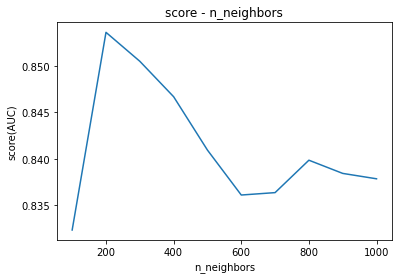

In [45]:
#不同n-neighbors score可视化

plt.plot(range(100, 1000+1, 100), scorelist)
plt.title('score - n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score(AUC)')

#可以看到在k=300左右时auc得最大值

In [48]:
#接下来减小step来继续缩小k的范围
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(150, 300+1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algorithm)
    knn.fit(x_learn, y_learn)
    y_pred = knn.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)
comparison.append(['KNN_{}_{}_{}'.format(weight,algorithm,n_neighbors),maxauc])

#可以看到在k取260的时候score达到最佳

150 0.8404618082618861
160 0.8436132262126027
170 0.847615264704119
180 0.8493577252832905
190 0.8507441992925234
200 0.8536220696684454
210 0.8521044427123928
220 0.856529917860783
230 0.8575978775705977
240 0.8539405839678638
250 0.8532173691468313
260 0.8533410276395467
270 0.8521119371664968
280 0.8495638227711494
290 0.851257569398645
300 0.8505081239882487

230 0.8575978775705977


In [49]:
#朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_learn, y_learn)
y_pred = gaussian.predict_proba(x_valid)[:,1]
score = roc_auc_score(y_valid, y_pred)
print(score)

comparison.append(['GaussianNB',score])

0.8347210564182505


In [50]:
#决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'criterion':['gini','entropy']
    },
    scoring='roc_auc',
    verbose=3
)
grid.fit(x_learn, y_learn)

for result in grid.cv_results_:
    print(result, grid.cv_results_[result])
print (grid.best_params_['criterion']) #寻找最佳param

tree = DecisionTreeClassifier(criterion=grid.best_params_['criterion'])
tree.fit(x_learn, y_learn)
y_pred = tree.predict_proba(x_valid)[:,1]
score = roc_auc_score(y_valid, y_pred)
print(score)
comparison.append(['DecisionTreeClassifier_{}'.format(grid.best_params_['criterion']),score])

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....................criterion=gini;, score=0.599 total time=   0.0s
[CV 2/5] END ....................criterion=gini;, score=0.627 total time=   0.0s
[CV 3/5] END ....................criterion=gini;, score=0.601 total time=   0.0s
[CV 4/5] END ....................criterion=gini;, score=0.578 total time=   0.0s
[CV 5/5] END ....................criterion=gini;, score=0.563 total time=   0.0s
[CV 1/5] END .................criterion=entropy;, score=0.612 total time=   0.0s
[CV 2/5] END .................criterion=entropy;, score=0.589 total time=   0.0s
[CV 3/5] END .................criterion=entropy;, score=0.587 total time=   0.0s
[CV 4/5] END .................criterion=entropy;, score=0.543 total time=   0.0s
[CV 5/5] END .................criterion=entropy;, score=0.592 total time=   0.0s
mean_fit_time [0.01260738 0.00927129]
std_fit_time [0.00080833 0.00666286]
mean_score_time [0.00100026 0.00353975]
std_score_time 

In [51]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators':[30,50,80,100,200]
    },
    scoring='roc_auc',
    verbose=3
)

grid.fit(x_learn, y_learn)
for result in grid.cv_results_:
    print(result, grid.cv_results_[result])
print(grid.best_params_['n_estimators'])

rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
rfc.fit(x_learn, y_learn)
y_pred = rfc.predict_proba(x_valid)[:,1]
score = roc_auc_score(y_valid, y_pred)
print(score)

comparison.append(['RandomForestClassifier_{}'.format(grid.best_params_['n_estimators']),score])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...................n_estimators=30;, score=0.764 total time=   0.0s
[CV 2/5] END ...................n_estimators=30;, score=0.759 total time=   0.0s
[CV 3/5] END ...................n_estimators=30;, score=0.819 total time=   0.0s
[CV 4/5] END ...................n_estimators=30;, score=0.767 total time=   0.0s
[CV 5/5] END ...................n_estimators=30;, score=0.765 total time=   0.0s
[CV 1/5] END ...................n_estimators=50;, score=0.805 total time=   0.1s
[CV 2/5] END ...................n_estimators=50;, score=0.800 total time=   0.1s
[CV 3/5] END ...................n_estimators=50;, score=0.805 total time=   0.1s
[CV 4/5] END ...................n_estimators=50;, score=0.783 total time=   0.1s
[CV 5/5] END ...................n_estimators=50;, score=0.751 total time=   0.1s
[CV 1/5] END ...................n_estimators=80;, score=0.787 total time=   0.1s
[CV 2/5] END ...................n_estimators=80;,

In [52]:
comparison #比较不同模型,可以看出在KNN在该数据集表现得最好，且在n-neighbors=230是最好的表现

[['LogisticRegressionCV_lbfgs', 0.8470681695545297],
 ['KNN_uniform_auto_260', 0.8533410276395467],
 ['KNN_uniform_auto_230', 0.8575978775705977],
 ['KNN_uniform_auto_230', 0.8575978775705977],
 ['GaussianNB', 0.8347210564182505],
 ['DecisionTreeClassifier_gini', 0.6031761496492595],
 ['RandomForestClassifier_200', 0.8283432759757778]]

In [53]:
#可以看出随机森林在该数据集的表现也很好，达到了0.828，与KNN模型最好的值相差不多，因此对该模型进行更细致的调参
#对该模型进行更细致的调参（n_estimators 和 criterion）

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators':np.arange(180, 230, 10),
        'criterion':['gini', 'entropy']
    },
    scoring='roc_auc',
    verbose=3
)

grid.fit(x_learn, y_learn)
for result in grid.cv_results_:
    print(result, grid.cv_results_[result])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..criterion=gini, n_estimators=180;, score=0.774 total time=   0.5s
[CV 2/5] END ..criterion=gini, n_estimators=180;, score=0.807 total time=   0.5s
[CV 3/5] END ..criterion=gini, n_estimators=180;, score=0.822 total time=   0.5s
[CV 4/5] END ..criterion=gini, n_estimators=180;, score=0.786 total time=   0.5s
[CV 5/5] END ..criterion=gini, n_estimators=180;, score=0.779 total time=   0.5s
[CV 1/5] END ..criterion=gini, n_estimators=190;, score=0.783 total time=   0.5s
[CV 2/5] END ..criterion=gini, n_estimators=190;, score=0.802 total time=   0.5s
[CV 3/5] END ..criterion=gini, n_estimators=190;, score=0.838 total time=   0.5s
[CV 4/5] END ..criterion=gini, n_estimators=190;, score=0.803 total time=   0.5s
[CV 5/5] END ..criterion=gini, n_estimators=190;, score=0.779 total time=   0.5s
[CV 1/5] END ..criterion=gini, n_estimators=200;, score=0.796 total time=   0.5s
[CV 2/5] END ..criterion=gini, n_estimators=200;

In [54]:
rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                         criterion=grid.best_params_['criterion'])
rfc.fit(x_learn, y_learn)
y_pred = rfc.predict_proba(x_valid)[:,1]
score = roc_auc_score(y_valid, y_pred)
print(score)

0.8467234246657473
